# Part1 - Import Crime Data 
Given the unavailability of online crime data in Morocco, all data used in this example are fictitious

# Import the Required Libraries

In [1]:
# Import Pandas and Numpy to provide DataFrame support
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np

In [2]:
# Use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("darkgrid")

font = {'size'   : 12}
mpl.rc('font', **font)

In [3]:
!pip install folium

In [3]:
# Use Folium to display the Maps for Visualisation
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from folium import plugins

# Module to convert an address into latitude and longitude values
from geopy.geocoders import Nominatim

In [4]:

search_params = {
    'client_id': 'QWEHISXXBPHDO2WD2KLJ1VI5YIYO31JMIG2GRCEMWRDSLDM4',
    'client_secret': 'AE10CHPO42G0TTTDHOMVER3F40ZLTM4AUVBRACJLGG5GWEHI',
    'intent': 'browse',
    'limit': 50,
    'v': '20180604'
}

In [5]:
# All the SciKit Learn Libraries Required
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score

def cross_validate(model, n_splits = 10):
    
    k_fold = KFold(n_splits = n_splits)
    scores = [model.fit(X[train], y[train]).score(X[test], y[test]) for train, test in k_fold.split(X)]
    
    scores = np.percentile(scores, [40, 50, 60])
    return scores

In [6]:

# These are the columns that we want to keep.
# Columns not listed here won't be imported, speeding things up.
crime_keep_columns = ['CASE#',
                      'DATE  OF OCCURRENCE',
                      'BLOCK', 
                      ' PRIMARY DESCRIPTION',
                      'WARD',
                      'LATITUDE',
                      'LONGITUDE']

# Download csv
#!wget -O crimes.csv https://github.com/ousrah/Coursera_Capstone/blob/master/CasaCrimes.csv?accessType=DOWNLOAD


df = pd.read_csv('CasaCrimes3.csv',delimiter=";",
                 usecols=crime_keep_columns)

In [7]:
df.head(10)

,CASE#,DATE OF OCCURRENCE,BLOCK,PRIMARY DESCRIPTION,WARD,LATITUDE,LONGITUDE
0,JB402067,08/19/2018 08:00,065XX N CALIFORNIA AVE,DECEPTIVE PRACTICE,50,33.599988,-7.599711
1,JA554738,12/18/2017 10:00,065XX N CALIFORNIA AVE,OTHER OFFENSE,50,33.599988,-7.599711
2,JB228215,04/18/2018 01:30,065XX N RICHMOND ST,BURGLARY,50,33.599978,-7.503375
3,JA542410,12/08/2017 21:00,065XX N RIDGE BLVD,CRIMINAL DAMAGE,50,33.599978,-7.577762
4,JB377621,08/03/2018 14:00,065XX N FRANCISCO AVE,THEFT,50,33.599966,-7.502150
5,JB191261,03/19/2018 04:00,065XX N TALMAN AVE,THEFT,50,33.599957,-7.596047
6,JB414546,08/29/2018 05:00,065XX N WASHTENAW AVE,DECEPTIVE PRACTICE,50,33.599956,-7.597269
7,JB375530,07/11/2018 14:34,065XX N MOZART ST,THEFT,50,33.599949,-7.500929
8,JB284184,05/27/2018 12:00,014XX W ARTHUR AVE,CRIMINAL DAMAGE,40,33.599947,-7.567245
9,JB128946,01/25/2018 06:45,065XX N HARLEM AVE,BURGLARY,41,33.599939,-7.506770


In [8]:
df.shape

(93483, 7)

In [9]:
df.tail()

,CASE#,DATE OF OCCURRENCE,BLOCK,PRIMARY DESCRIPTION,WARD,LATITUDE,LONGITUDE
93478,JB251655,05/05/2018 19:40,136XX S BRAINARD AVE,BATTERY,10,33.147454,-7.544596
93479,JB411383,08/27/2018 07:40,136XX S BRAINARD AVE,CRIMINAL DAMAGE,10,33.147119,-7.544161
93480,JA563984,12/26/2017 10:50,003XX E 136TH PL,ROBBERY,9,33.147038,-7.514224
93481,JB109782,01/05/2018 13:00,003XX E 137TH ST,BURGLARY,9,33.145836,-7.514611
93482,JB398632,08/17/2018 02:30,137XX S BRAINARD AVE,MOTOR VEHICLE THEFT,10,33.145796,-7.542472


In [10]:
# Strip leading & trailing whitespace
df.columns = df.columns.str.strip()

# Replace multiple spaces with a single space
df.columns = df.columns.str.replace('\s{2,}', ' ')

# Replace # with blank
df.columns = df.columns.str.replace('#', '')

# Replace spaces with _
df.columns = df.columns.str.replace(' ', '_')

# Convert to lowercase
df.columns = df.columns.str.lower()

# Move September 2017 dates to September 2018
df.date_of_occurrence.replace(to_replace="(09/\\d+)/2017", value=r"\1/2018", regex=True, inplace=True)

In [11]:
df.dtypes

case                    object
date_of_occurrence      object
block                   object
primary_description     object
ward                     int64
latitude               float64
longitude              float64
dtype: object

In [12]:
df['date_of_occurrence'] =  pd.to_datetime(df['date_of_occurrence'], format='%m/%d/%Y %H:%M')

In [13]:
df['hour'] = df['date_of_occurrence'].dt.hour
df['day_name'] = df['date_of_occurrence'].dt.day_name()
df['day'] = df['date_of_occurrence'].dt.dayofweek + 1
df['month_name'] = df['date_of_occurrence'].dt.month_name()
df['month'] = df['date_of_occurrence'].dt.month
df['year'] = df['date_of_occurrence'].dt.year
df['year_month'] = df['date_of_occurrence'].dt.to_period('M')

In [14]:
df.head()

,case,date_of_occurrence,block,primary_description,ward,latitude,longitude,hour,day_name,day,month_name,month,year,year_month
0,JB402067,2018-08-19 08:00:00,065XX N CALIFORNIA AVE,DECEPTIVE PRACTICE,50,33.599988,-7.599711,8,Sunday,7,August,8,2018,2018-08
1,JA554738,2017-12-18 10:00:00,065XX N CALIFORNIA AVE,OTHER OFFENSE,50,33.599988,-7.599711,10,Monday,1,December,12,2017,2017-12
2,JB228215,2018-04-18 01:30:00,065XX N RICHMOND ST,BURGLARY,50,33.599978,-7.503375,1,Wednesday,3,April,4,2018,2018-04
3,JA542410,2017-12-08 21:00:00,065XX N RIDGE BLVD,CRIMINAL DAMAGE,50,33.599978,-7.577762,21,Friday,5,December,12,2017,2017-12
4,JB377621,2018-08-03 14:00:00,065XX N FRANCISCO AVE,THEFT,50,33.599966,-7.502150,14,Friday,5,August,8,2018,2018-08


In [15]:
df['zip'] = df.block.str.split(' ').str[0]
df['street'] = df.block.str.split(' ').str[1:].apply(', '.join)

In [16]:
df.head()


,case,date_of_occurrence,block,primary_description,ward,latitude,longitude,hour,day_name,day,month_name,month,year,year_month,zip,street
0,JB402067,2018-08-19 08:00:00,065XX N CALIFORNIA AVE,DECEPTIVE PRACTICE,50,33.599988,-7.599711,8,Sunday,7,August,8,2018,2018-08,065XX,"N, CALIFORNIA, AVE"
1,JA554738,2017-12-18 10:00:00,065XX N CALIFORNIA AVE,OTHER OFFENSE,50,33.599988,-7.599711,10,Monday,1,December,12,2017,2017-12,065XX,"N, CALIFORNIA, AVE"
2,JB228215,2018-04-18 01:30:00,065XX N RICHMOND ST,BURGLARY,50,33.599978,-7.503375,1,Wednesday,3,April,4,2018,2018-04,065XX,"N, RICHMOND, ST"
3,JA542410,2017-12-08 21:00:00,065XX N RIDGE BLVD,CRIMINAL DAMAGE,50,33.599978,-7.577762,21,Friday,5,December,12,2017,2017-12,065XX,"N, RIDGE, BLVD"
4,JB377621,2018-08-03 14:00:00,065XX N FRANCISCO AVE,THEFT,50,33.599966,-7.502150,14,Friday,5,August,8,2018,2018-08,065XX,"N, FRANCISCO, AVE"


# Clearing data

In [17]:
df.isna().sum()

case                   0
date_of_occurrence     0
block                  0
primary_description    0
ward                   0
latitude               0
longitude              0
hour                   0
day_name               0
day                    0
month_name             0
month                  0
year                   0
year_month             0
zip                    0
street                 0
dtype: int64

In [18]:
df.dropna(inplace=True)
df.reindex()
df.head()

,case,date_of_occurrence,block,primary_description,ward,latitude,longitude,hour,day_name,day,month_name,month,year,year_month,zip,street
0,JB402067,2018-08-19 08:00:00,065XX N CALIFORNIA AVE,DECEPTIVE PRACTICE,50,33.599988,-7.599711,8,Sunday,7,August,8,2018,2018-08,065XX,"N, CALIFORNIA, AVE"
1,JA554738,2017-12-18 10:00:00,065XX N CALIFORNIA AVE,OTHER OFFENSE,50,33.599988,-7.599711,10,Monday,1,December,12,2017,2017-12,065XX,"N, CALIFORNIA, AVE"
2,JB228215,2018-04-18 01:30:00,065XX N RICHMOND ST,BURGLARY,50,33.599978,-7.503375,1,Wednesday,3,April,4,2018,2018-04,065XX,"N, RICHMOND, ST"
3,JA542410,2017-12-08 21:00:00,065XX N RIDGE BLVD,CRIMINAL DAMAGE,50,33.599978,-7.577762,21,Friday,5,December,12,2017,2017-12,065XX,"N, RIDGE, BLVD"
4,JB377621,2018-08-03 14:00:00,065XX N FRANCISCO AVE,THEFT,50,33.599966,-7.502150,14,Friday,5,August,8,2018,2018-08,065XX,"N, FRANCISCO, AVE"


In [19]:
df.isna().sum()

case                   0
date_of_occurrence     0
block                  0
primary_description    0
ward                   0
latitude               0
longitude              0
hour                   0
day_name               0
day                    0
month_name             0
month                  0
year                   0
year_month             0
zip                    0
street                 0
dtype: int64

# Show Cases per Month per day of week and per hour

Text(0.0, 1.0, 'Count of Cases Per Month')

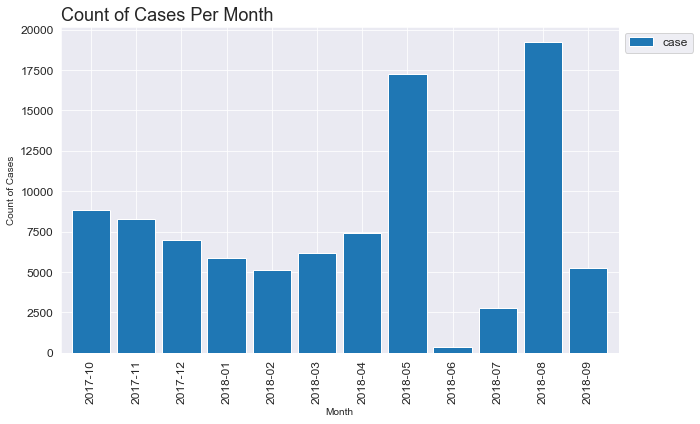

In [20]:
df.groupby('year_month').count().plot(y = 'case', 
                                      kind='bar',
                                      figsize=(10,6),
                                      width=0.85,
                                      fontsize=12,
                                      colormap='tab20').legend(bbox_to_anchor=(1,1),
                                                               prop={'size': 12})

plt.xlabel('Month')
plt.ylabel('Count of Cases')
plt.title('Count of Cases Per Month', loc='left', fontsize=18)

Text(0.0, 1.0, 'Count of Cases Per Day of Week [1 is a Tuesday]')

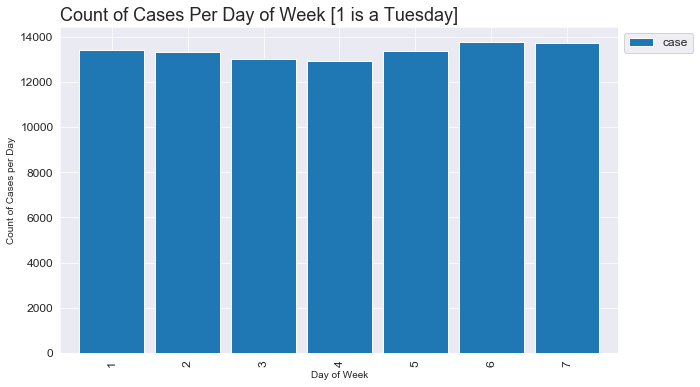

In [21]:
df.groupby('day').count().plot(y = 'case',
                               kind='bar',
                               figsize=(10,6),
                               width=0.85,
                               fontsize=12,
                               colormap='tab20').legend(bbox_to_anchor=(1,1),
                                                        prop={'size': 12})

plt.xlabel('Day of Week')
plt.ylabel('Count of Cases per Day')
plt.title('Count of Cases Per Day of Week [1 is a Tuesday]', loc='left', fontsize=18)

Text(0.0, 1.0, 'Count of Cases Per Hour]')

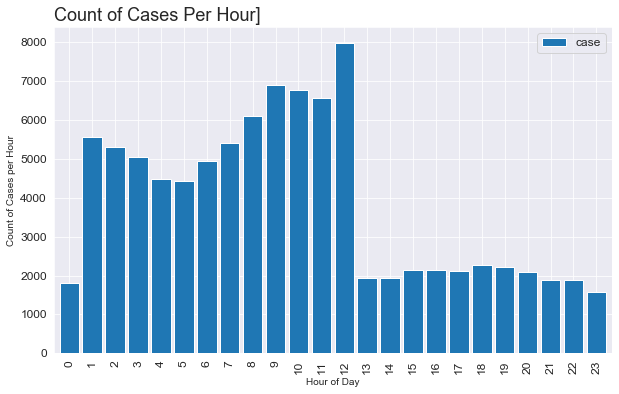

In [22]:
df.groupby('hour').count().plot(y = 'case',
                               kind='bar',
                               figsize=(10,6),
                               width=0.85,
                               fontsize=12,
                               colormap='tab20').legend(bbox_to_anchor=(1,1),
                                                        prop={'size': 12})

plt.xlabel('Hour of Day')
plt.ylabel('Count of Cases per Hour')
plt.title('Count of Cases Per Hour]', loc='left', fontsize=18)

In [23]:
df.primary_description.nunique()

32

In [24]:
df[['primary_description', 'case']].groupby(
    ['primary_description'], as_index=False).count().sort_values(
    'case', ascending=False).head(3)

,primary_description,case
30,THEFT,22861
2,BATTERY,17760
6,CRIMINAL DAMAGE,9718


In [25]:
top_crimes = df[['primary_description', 'case']].groupby(
    ['primary_description']).count().sort_values('case', ascending=False)[:10].axes[0].tolist()

# Create a list of the 3 most commonly occuring crimes
top_three_crimes = df[['primary_description', 'case']].groupby(
    ['primary_description']).count().sort_values('case', ascending=False)[:3].axes[0].tolist()

# Create a list of the 2 most commonly occuring crimes
top_two_crimes = df[['primary_description', 'case']].groupby(
    ['primary_description']).count().sort_values('case', ascending=False)[:2].axes[0].tolist()

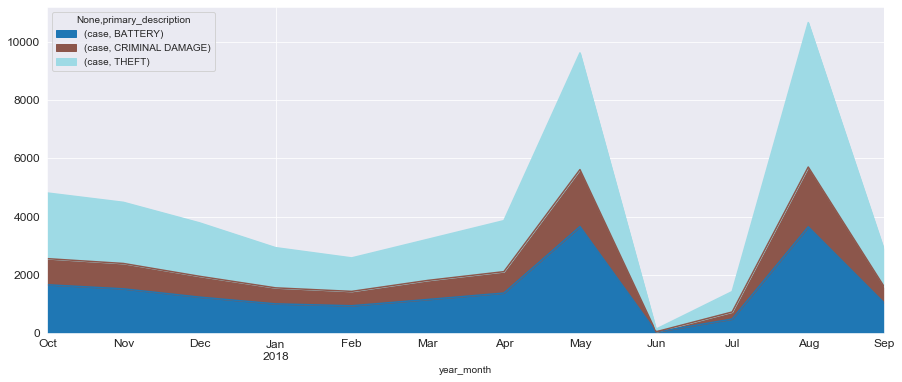

In [26]:
# Create a new data frame with just the top 10 crimes
df_top_crimes = df[df['primary_description'].isin(top_crimes)].copy()

# Create a new data frame with just the top 10 crimes
df_top3_crimes = df[df['primary_description'].isin(top_three_crimes)].copy()

df_top3_crimes[['case', 'primary_description', 'year_month']].pivot_table(
    index='year_month', 
    columns='primary_description', 
    fill_value=0, 
    aggfunc='count').plot(kind='area',
                          stacked=True,
                          figsize=(15, 6),
                               fontsize=12,
                               colormap='tab20')

Text(0.0, 1.0, 'Count of Cases Per Hour]')

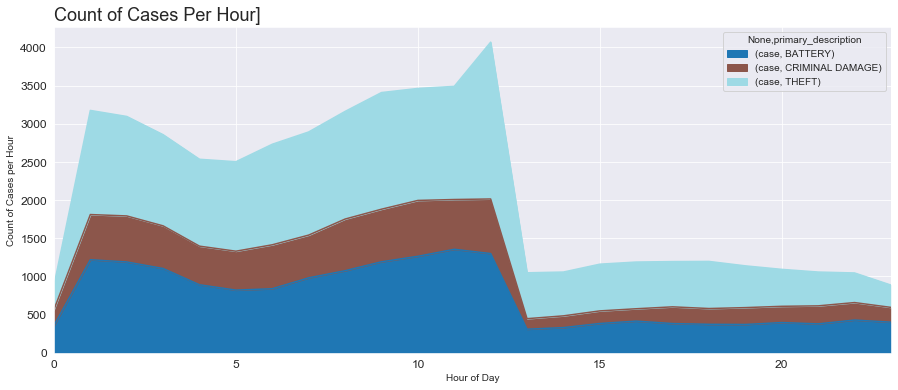

In [27]:
df_top3_crimes[['case', 'primary_description', 'hour']].pivot_table(
    index='hour', 
    columns='primary_description', 
    fill_value=0, 
    aggfunc='count').plot(kind='area',
                          stacked=True,
                          figsize=(15, 6),
                               fontsize=12,
                               colormap='tab20')

plt.xlabel('Hour of Day')
plt.ylabel('Count of Cases per Hour')
plt.title('Count of Cases Per Hour]', loc='left', fontsize=18)

In [28]:
df_top_crimes.dtypes

case                           object
date_of_occurrence     datetime64[ns]
block                          object
primary_description            object
ward                            int64
latitude                      float64
longitude                     float64
hour                            int64
day_name                       object
day                             int64
month_name                     object
month                           int64
year                            int64
year_month                  period[M]
zip                            object
street                         object
dtype: object

# Preparing data for visualisation on folium MAP

In [29]:
# Create a list of colours. 
# We have  list of the top 10 crimes from earlier
colors = [
    'red',
    'blue',
    'gray',
    'orange',
    'beige',
    'green',
    'purple',
    'pink',
    'cadetblue',
    'black'
]

# Create a dictionary of colours to map to the crimes
dict_colours = dict(zip(top_crimes, colors))

# Add the colours colums to the df_top_crimes DataFrame
df_top_crimes['colour'] = df_top_crimes.primary_description.map(dict_colours)

In [74]:
df_top_crimes_august = df_top_crimes[df_top_crimes.month_name == 'August']
df_top_crimes_august = df_top_crimes_august.head(1500)
# Pickle the DataFrame to Separate the Folium Maps into a Separate Notepad
df_top_crimes_august.to_pickle('crimes.pkl')
df_top_crimes_august.head()

,case,date_of_occurrence,block,primary_description,ward,latitude,longitude,hour,day_name,day,month_name,month,year,year_month,zip,street,colour
0,JB402067,2018-08-19 08:00:00,065XX N CALIFORNIA AVE,DECEPTIVE PRACTICE,50,33.599988,-7.599711,8,Sunday,7,August,8,2018,2018-08,065XX,"N, CALIFORNIA, AVE",beige
4,JB377621,2018-08-03 14:00:00,065XX N FRANCISCO AVE,THEFT,50,33.599966,-7.502150,14,Friday,5,August,8,2018,2018-08,065XX,"N, FRANCISCO, AVE",red
6,JB414546,2018-08-29 05:00:00,065XX N WASHTENAW AVE,DECEPTIVE PRACTICE,50,33.599956,-7.597269,5,Wednesday,3,August,8,2018,2018-08,065XX,"N, WASHTENAW, AVE",beige
14,JB387165,2018-08-10 09:10:00,065XX N ONARGA AVE,ASSAULT,41,33.599919,-7.508915,9,Friday,5,August,8,2018,2018-08,065XX,"N, ONARGA, AVE",orange
15,JB375181,2018-08-01 22:07:00,015XX W ARTHUR AVE,BATTERY,40,33.599918,-7.569725,22,Wednesday,3,August,8,2018,2018-08,015XX,"W, ARTHUR, AVE",blue


In [344]:
# Define Casablanca's geolocation coordinates
Casablanca_latitude = 33.5  
Casablanca_longitude = -7.5

# Define the world map centered around Casablanca with a higher zoom level
Casablanca_map = folium.Map(location=[Casablanca_latitude, Casablanca_longitude], zoom_start=11)

# display world map
#Casablanca_map
df_top_crimes_august.head()

# Instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

#loop through the 100 crimes and add each to the incidents feature group
for lat, lng, col in zip(df_top_crimes_august.latitude, 
                        df_top_crimes_august.longitude, 
                         df_top_crimes_august.colour):
    l = float(lat)
    g = float(lng)
    incidents.add_child(folium.features.CircleMarker([l , g],radius=1,color=col,fill=True,fill_color=col))
    

# add incidents to map
Casablanca_map.add_child(incidents)

# Clustering Crimes by zone

In [345]:
mc = MarkerCluster()

# Define the world map centered around Casablanca with a higher zoom level
Casablanca_cluster = folium.Map(location=[Casablanca_latitude, Casablanca_longitude], zoom_start=11)

# display world map
Casablanca_cluster

#creating a Marker for each point in df_sample. Each point will get a popup with their zip
for row in df_top_crimes_august.itertuples():
    mc.add_child(folium.Marker(
        location=[row.latitude,  row.longitude],
                 popup=row.primary_description))

Casablanca_cluster.add_child(mc)
Casablanca_cluster

# Show crimes in heat MAP

In [347]:
from folium import plugins
from folium.plugins import HeatMap

Casablanca_heatmat = folium.Map(location=[Casablanca_latitude, Casablanca_longitude], zoom_start=11) 

# List comprehension to make out list of lists
heat_data = [[row['latitude'], 
              row['longitude']] for index, row in df_top_crimes_august.iterrows()]

# Plot it on the map
HeatMap(heat_data,
        min_opacity=0.5,
        max_zoom=18, 
        max_val=1.0, 
        radius=15,
        blur=20,
        gradient=None,
        overlay=True).add_to(Casablanca_heatmat)

# Display the map
Casablanca_heatmat

# Data Preparation for Modelling

In [348]:
df_top_crimes.dtypes

case                           object
date_of_occurrence     datetime64[ns]
block                          object
primary_description            object
ward                            int64
latitude                      float64
longitude                     float64
hour                            int64
day_name                       object
day                             int64
month_name                     object
month                           int64
year                            int64
year_month                  period[M]
zip                            object
street                         object
colour                         object
dtype: object

In [31]:
# Start by copying the Latitude and Longitude to the new DataFrame
df_features = df_top_crimes[['latitude', 'longitude']]

# Next and One Hot Encoding of the hour, day and month variables
df_features = df_features.join(pd.get_dummies(df_top_crimes.hour, prefix='hour'))
df_features = df_features.join(pd.get_dummies(df_top_crimes.day_name))
df_features = df_features.join(pd.get_dummies(df_top_crimes.month_name))

# Finally add the ward & crimes column, copied from the original Primary Description column
df_features['ward'] = df_top_crimes[['ward']]
df_features['crimes'] = df_top_crimes[['primary_description']]

In [32]:
df_features.head()

,latitude,longitude,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September,ward,crimes
0,33.599988,-7.599711,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,50,DECEPTIVE PRACTICE
1,33.599988,-7.599711,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,50,OTHER OFFENSE
2,33.599978,-7.503375,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,50,BURGLARY
3,33.599978,-7.577762,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,50,CRIMINAL DAMAGE
4,33.599966,-7.502150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,50,THEFT


In [33]:
# Create a smaller DataFrame of only the top three crimes
df_features_3 = df_features[df_features['crimes'].isin(top_three_crimes)].copy()

# Create a smaller DataFrame of only the top two crimes
df_features_2 = df_features[df_features['crimes'].isin(top_two_crimes)].copy()

In [34]:
#  Create the X, dependant variables, DataFrames by dropping the Crimes column
X_10 = df_features.copy()
y_10 = X_10.crimes.values

X_10.drop('crimes', axis=1, inplace=True)
X_10 = preprocessing.StandardScaler().fit(X_10).transform(X_10)


X_3 = df_features_3.copy()
y_3 = X_3.crimes.values

X_3.drop('crimes', axis=1, inplace=True)
X_3 = preprocessing.StandardScaler().fit(X_3).transform(X_3)

X_2 = df_features_2.copy()
y_2 = X_2.crimes.values

X_2.drop('crimes', axis=1, inplace=True)
X_2 = preprocessing.StandardScaler().fit(X_2).transform(X_2)

In [35]:
# Set X = X_10
X = X_10
y = y_10

In [36]:
# Set X = X_3
X = X_3
y = y_3

In [37]:
# Set X = X_2
X = X_2
y = y_2

Heighbours:  5   2019-11-01 23:06:53.165620
Heighbours:  6   2019-11-01 23:09:50.524522
Heighbours:  7   2019-11-01 23:12:52.834813
Heighbours:  8   2019-11-01 23:15:55.168958
Heighbours:  9   2019-11-01 23:19:02.794082
Heighbours:  10   2019-11-01 23:22:15.122619
Heighbours:  11   2019-11-01 23:25:34.973024


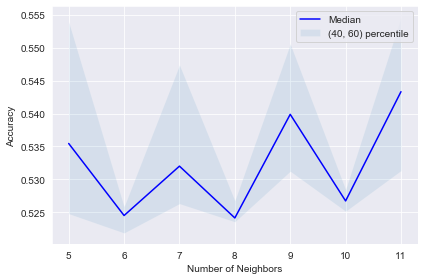

In [358]:
import datetime
from datetime import datetime
# Number of neighbours
neighs = range(5, 12)

# Store the scores
scores = np.zeros((len(neighs), 3))

for idx, neigh in enumerate(neighs):
    print('Heighbours: ', neigh, ' ', str(datetime.now()))
    model = KNeighborsClassifier(n_neighbors = neigh)
    scores[idx, : ] = cross_validate(model, n_splits = 5)

plt.plot(neighs, scores[ : , 1], 'b')
plt.fill_between(neighs, scores[ : , 0], scores[:, 2], alpha = 0.1)
plt.legend(('Median', '(40, 60) percentile'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.tight_layout()
plt.show()

Depth:  10   2019-11-02 20:46:41.764097
Depth:  11   2019-11-02 20:46:47.277984
Depth:  12   2019-11-02 20:46:53.695436
Depth:  13   2019-11-02 20:47:00.164840
Depth:  14   2019-11-02 20:47:06.917564
Depth:  15   2019-11-02 20:47:14.924510


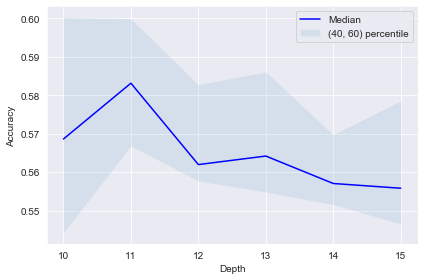

In [38]:
# Decision Tree
from datetime import datetime
from sklearn.tree import DecisionTreeClassifier

depths = range(10, 16)
scores = np.zeros((len(depths), 3))
# scores = np.zeros((len(depths), 2))
for idx, depth in enumerate(depths):
    print('Depth: ', depth, ' ', str(datetime.now()))
    model = DecisionTreeClassifier(criterion = "entropy", max_depth = depth)
    scores[idx, : ] = cross_validate(model, n_splits = 10)

plt.plot(depths, scores[ : , 1], 'b')
plt.fill_between(depths, scores[ : , 0], scores[:, 2], alpha = 0.1)
plt.legend(('Median', '(40, 60) percentile'))
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.tight_layout()
plt.show()


C:  0.01   2019-11-02 20:47:33.197737
C:  0.03162277660168379   2019-11-02 20:47:36.585907
C:  0.1   2019-11-02 20:47:40.008371
C:  0.31622776601683794   2019-11-02 20:47:43.440246
C:  1.0   2019-11-02 20:47:47.009692
C:  3.1622776601683795   2019-11-02 20:47:50.374623


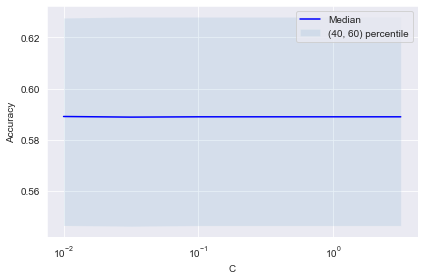

In [39]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

C = np.logspace(-2.0, 0.5, num = 6, endpoint = True)
scores = np.zeros((len(C), 3))
for idx, c in enumerate(C):
    print('C: ', c, ' ', str(datetime.now()))
    model = LogisticRegression(C = c, solver = 'liblinear')
    scores[idx, : ] = cross_validate(model, n_splits = 10)

plt.plot(C, scores[ : , 1], 'b')
plt.xscale('log')
plt.fill_between(C, scores[ : , 0], scores[:, 2], alpha = 0.1)
plt.legend(('Median', '(40, 60) percentile'))
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.tight_layout()
plt.show()

Alpha:  0.1   2019-11-02 20:48:10.032141
Alpha:  0.2   2019-11-02 20:48:12.563598
Alpha:  0.30000000000000004   2019-11-02 20:48:15.776575
Alpha:  0.4   2019-11-02 20:48:19.379874
Alpha:  0.5   2019-11-02 20:48:22.724498
Alpha:  0.6   2019-11-02 20:48:25.488046
Alpha:  0.7000000000000001   2019-11-02 20:48:28.386461
Alpha:  0.8   2019-11-02 20:48:31.394001
Alpha:  0.9   2019-11-02 20:48:34.192978
Alpha:  1.0   2019-11-02 20:48:37.056988


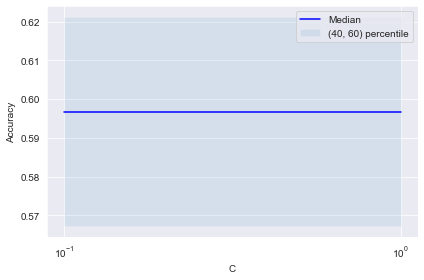

In [40]:
# Naive Bayes

alpha = np.linspace(0.1, 1, num=10)
scores = np.zeros((len(alpha), 3))
for idx, a in enumerate(alpha):
    print('Alpha: ', a, ' ', str(datetime.now()))
    model = BernoulliNB()
    scores[idx, : ] = cross_validate(model, n_splits = 10)

plt.plot(alpha, scores[ : , 1], 'b')
plt.xscale('log')
plt.fill_between(alpha, scores[ : , 0], scores[:, 2], alpha = 0.1)
plt.legend(('Median', '(40, 60) percentile'))
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.tight_layout()
plt.show()

Estimator:  12   2019-11-02 20:48:45.749124
Estimator:  13   2019-11-02 20:48:59.459364
Estimator:  14   2019-11-02 20:49:15.338998
Estimator:  15   2019-11-02 20:49:33.552927
Estimator:  16   2019-11-02 20:49:49.781009
Estimator:  17   2019-11-02 20:50:07.669716


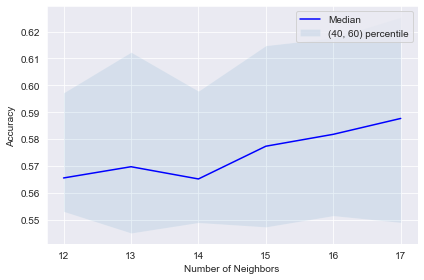

In [41]:
# Decision Forest using a Random Forest

est = range(12, 18)
scores = np.zeros((len(est), 3))
for idx, a in enumerate(est):
    print('Estimator: ', a, ' ', str(datetime.now()))
    model = RandomForestClassifier(n_estimators = a, max_features = 'sqrt')
    scores[idx, : ] = cross_validate(model, n_splits = 10)

plt.plot(est, scores[ : , 1], 'b')
plt.fill_between(est, scores[ : , 0], scores[:, 2], alpha = 0.1)
plt.legend(('Median', '(40, 60) percentile'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.tight_layout()
plt.show()

# Import and Process FourSquare Data

In [42]:
def cross_validate_02(model, n_splits = 10):

    Ks = 10
    mean_acc = np.zeros((Ks-1))
    std_acc = np.zeros((Ks-1))
    ConfustionMx = [];
    for n in range(1,Ks):

        #Train Model and Predict
        k_fold = KFold(n_splits = n_splits)
        for train, test in k_fold.split(X):
            neigh = KNeighborsClassifier(n_neighbors = n).fit(X[train], y[train])
            yhat=neigh.predict(X[test])
            mean_acc[n-1] = metrics.accuracy_score(y[test], yhat)
            std_acc[n-1]=np.std(yhat==y[test])/np.sqrt(yhat.shape[0])

    mean_acc
    
def cross_validate(model, n_splits = 10):
    
    k_fold = KFold(n_splits = n_splits)
    scores = [model.fit(X[train], y[train]).score(X[test], y[test]) for train, test in k_fold.split(X)]
    
    scores = np.percentile(scores, [40, 50, 60])
    return scores


In [43]:
import requests

page = requests.get("https://fr.foursquare.com/explore?mode=url&near=Casablanca%2C%20Maroc&nearGeoId=72057594040481540&q=Top%20Picks")

from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')
top_venues = soup.find_all('div', class_='venueDetails')

In [52]:
venue_columns = ['id', 
                 'score', 
                 'category', 
                 'name', 
                 'address',
                 'postalcode',
                 'city',
                 'href', 
                 'latitude', 
                 'longitude']

df_top_venues = pd.DataFrame(columns=venue_columns)

for venue in top_venues:
    venue_name = venue.find(target="_blank").get_text()
    venue_score = venue.find(class_="venueScore").get_text()
    venue_cat = venue.find(class_="categoryName").get_text()
    venue_href = venue.find(class_="venueName").h2.a['href']
    venue_id = venue_href.split('/')[-1]

    if 'promotedTipId' in venue_id: 
        continue
      
    
   
    
    # Get the properly formatted address and the latitude and longitude
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(
        venue_id, 
        'QWEHISXXBPHDO2WD2KLJ1VI5YIYO31JMIG2GRCEMWRDSLDM4',
        'AE10CHPO42G0TTTDHOMVER3F40ZLTM4AUVBRACJLGG5GWEHI',
        '20180604')
    
    result = requests.get(url).json()
    
    print(result)
    venue_latitude = result['response']['venue']['location']['lat']
    venue_longitude = result['response']['venue']['location']['lng']
    
    df_top_venues = df_top_venues.append({'id': venue_id,
                                          'score': venue_score,
                                          'category': venue_cat,
                                          'name': venue_name,
                                          'href': venue_href,
                                          'latitude': venue_latitude,
                                          'longitude': venue_longitude}, ignore_index=True)

{'meta': {'code': 200, 'requestId': '5dbde007e826ac001b1a7545'}, 'response': {'venue': {'id': '5409d76e498ec61f469f8d59', 'name': 'Tacos Top', 'contact': {}, 'location': {'lat': 33.571207121890964, 'lng': -7.612778473934192, 'labeledLatLngs': [{'label': 'display', 'lat': 33.571207121890964, 'lng': -7.612778473934192}], 'cc': 'MA', 'country': 'المغرب', 'formattedAddress': ['المغرب']}, 'canonicalUrl': 'https://foursquare.com/v/tacos-top/5409d76e498ec61f469f8d59', 'categories': [{'id': '4bf58dd8d48988d16e941735', 'name': 'Fast Food Restaurant', 'pluralName': 'Fast Food Restaurants', 'shortName': 'Fast Food', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 2}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 7, 'groups': [{'type': 'others', 'count': 7, 'items': [{'id': '82949426', 'firstName': 'Oussama', 'lastName': 'Tabriki', 'gender': 'male', 'photo': {'

{'meta': {'code': 200, 'requestId': '5dbde0312b274a0039f2b16d'}, 'response': {'venue': {'id': '51f918bd498e44442861a707', 'name': 'Topkapi Hammams', 'contact': {}, 'location': {'lat': 33.592251414816346, 'lng': -7.64443524698071, 'labeledLatLngs': [{'label': 'display', 'lat': 33.592251414816346, 'lng': -7.64443524698071}], 'cc': 'MA', 'country': 'المغرب', 'formattedAddress': ['المغرب']}, 'canonicalUrl': 'https://foursquare.com/v/topkapi-hammams/51f918bd498e44442861a707', 'categories': [{'id': '4bf58dd8d48988d1ed941735', 'name': 'Spa', 'pluralName': 'Spas', 'shortName': 'Spa', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/spa_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'likes': {'count': 2, 'groups': [{'type': 'others', 'count': 2, 'items': [{'id': '70994010', 'firstName': 'Kung Krissda', 'lastName': 'Tako', 'gender': 'female', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/70994010-FP1CXJOYU32FNZX0.jpg'}

In [55]:
# Import the preprocesses data from the Pickle file
#df_top_venues = pd.read_pickle('top_venues.pkl')

In [56]:
df_top_venues.shape

(4, 10)

In [57]:
df_top_venues.dtypes

id             object
score          object
category       object
name           object
address       float64
postalcode    float64
city          float64
href           object
latitude      float64
longitude     float64
dtype: object

In [58]:
df_top_venues['score'] = pd.to_numeric(df_top_venues['score'], errors='coerce').fillna(0)

In [59]:
df_top_venues.score.describe()

count    4.00
mean     1.75
std      3.50
min      0.00
25%      0.00
50%      0.00
75%      1.75
max      7.00
Name: score, dtype: float64

In [60]:
df_top_venues.head()

,id,score,category,name,address,postalcode,city,href,latitude,longitude
0,5409d76e498ec61f469f8d59,7.0,Fast-food,Tacos Top,NaN,NaN,NaN,/v/tacos-top/5409d76e498ec61f469f8d59,33.571207,-7.612778
1,4d6becf9f7228cfa5c18fc45,0.0,Bar à jus,Top Batido,NaN,NaN,NaN,/v/top-batido/4d6becf9f7228cfa5c18fc45,34.015819,-6.835050
2,51f918bd498e44442861a707,0.0,Spa,Topkapi Hammams,NaN,NaN,NaN,/v/topkapi-hammams/51f918bd498e44442861a707,33.592251,-7.644435
3,4fbde5b9e4b099c7d589859d,0.0,Café,Top Galaxy,NaN,NaN,NaN,/v/top-galaxy/4fbde5b9e4b099c7d589859d,33.972797,-6.892327


In [61]:
df_top_venues.to_pickle('top_venues.pkl')

In [62]:
restaurants_columns = ['id',
                       'score', 
                       'category', 
                       'categoryID', 
                       'name', 
                       'latitude',
                       'longitude', 
                       'venue_name', 
                       'venue_latitude',
                       'venue_longitude']

df_restaurant = pd.DataFrame(columns=restaurants_columns)

# Create a list of all the top venue latitude and longitude
top_venue_lats = df_top_venues['latitude'].values
top_venue_lngs = df_top_venues['longitude'].values

# Create a list of all the top venue names
top_venue_names = df_top_venues['name'].values

for ven_name, ven_lat, ven_long in zip(top_venue_names, top_venue_lats, top_venue_lngs):
    # print(ven_id, ven_name)
    
    # Configure additional Search parameters
    categoryId = '4d4b7105d754a06374d81259'
    radius = 500
    limit = 15
    
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(
        'QWEHISXXBPHDO2WD2KLJ1VI5YIYO31JMIG2GRCEMWRDSLDM4',
        'AE10CHPO42G0TTTDHOMVER3F40ZLTM4AUVBRACJLGG5GWEHI',
        ven_lat,
        ven_long,
        '20180604',
        categoryId,
        radius,
        limit)
    
    results = requests.get(url).json()
    
    # print(results['response'])
    
    # Want a good selection of Restaurents
    # If less than 10 ignore
    if len(results['response']['venues']) < 10:
        continue
        
    # Create a new dataframe with the list of restaurants
    # Get the values for each Restaurant from the JSON
    for restaurant in results['response']['venues']:
 
        # Sometimes there is no address. If so continue
        # if restaurant['location']['address']:
        #     continue
        
        try:
            # Get location details
            rest_id = restaurant['id']
            rest_category = restaurant['categories'][0]['pluralName']
            rest_categoryID = restaurant['categories'][0]['id']
            rest_name = restaurant['name']
            rest_latitude = restaurant['location']['lat']
            rest_longitude = restaurant['location']['lng']
            
            # Get the restaurant score and href
            rest_url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(
                rest_id, 
                'QWEHISXXBPHDO2WD2KLJ1VI5YIYO31JMIG2GRCEMWRDSLDM4',
                'AE10CHPO42G0TTTDHOMVER3F40ZLTM4AUVBRACJLGG5GWEHI',
                '20180604')
            result = requests.get(rest_url).json()

            rest_score = result['response']['venue']['rating']
            
            df_restaurant = df_restaurant.append({'id': rest_id,
                                                  'score': rest_score,
                                                  'category': rest_category,
                                                  'categoryID': rest_categoryID,
                                                  'name': rest_name,
                                                  'latitude': rest_latitude,
                                                  'longitude': rest_longitude,
                                                  'venue_name': ven_name,
                                                  'venue_latitude': ven_lat,
                                                  'venue_longitude': ven_long}, ignore_index=True)
            
        except:
            continue


In [63]:
df_restaurant.shape

(25, 10)

In [64]:
df_restaurant.head()

,id,score,category,categoryID,name,latitude,longitude,venue_name,venue_latitude,venue_longitude
0,4dd7c71b2271c5d36d42f5e5,5.7,Italian Restaurants,4bf58dd8d48988d110941735,Pasta Blanca,33.570526,-7.612940,Tacos Top,33.571207,-7.612778
1,565f44a7498ef7f12592776b,6.2,Snack Places,4bf58dd8d48988d1c7941735,Tacos de lyon,33.572109,-7.613887,Tacos Top,33.571207,-7.612778
2,4bf575ede5eba5931ed02090,7.8,Falafel Restaurants,4bf58dd8d48988d10b941735,Nizar Cham,33.572624,-7.613139,Tacos Top,33.571207,-7.612778
3,4d63b588dcafa1cde9427411,6.5,Pizza Places,4bf58dd8d48988d1ca941735,Pizza Hut,33.572362,-7.615142,Tacos Top,33.571207,-7.612778
4,4e599f4e52b1b78b81a04b73,7.5,Fast Food Restaurants,4bf58dd8d48988d16e941735,AYOUR,33.570383,-7.609602,Tacos Top,33.571207,-7.612778


In [65]:
df_restaurant.dtypes

id                  object
score              float64
category            object
categoryID          object
name                object
latitude           float64
longitude          float64
venue_name          object
venue_latitude     float64
venue_longitude    float64
dtype: object

In [66]:
df_restaurant.score.describe()

count    25.000000
mean      7.248000
std       0.954428
min       5.300000
25%       6.500000
50%       7.400000
75%       7.800000
max       9.100000
Name: score, dtype: float64

In [67]:
df_restaurant.category.nunique()

17

In [68]:
df_restaurant.name.nunique()

24

In [69]:
df_restaurant.groupby('category')['name'].count().sort_values(ascending=False)[:10]

category
Cafés                    4
Italian Restaurants      3
Fast Food Restaurants    3
Steakhouses              2
Indian Restaurants       1
Creperies                1
Diners                   1
Falafel Restaurants      1
French Restaurants       1
Turkish Restaurants      1
Name: name, dtype: int64

In [70]:
df_restaurant.groupby('category')['score'].mean().sort_values(ascending=False)[:10]

category
Steakhouses             8.150
Moroccan Restaurants    8.000
Cafés                   7.925
Tapas Restaurants       7.800
Falafel Restaurants     7.800
Diners                  7.500
French Restaurants      7.500
Turkish Restaurants     7.400
Italian Restaurants     7.300
Creperies               7.200
Name: score, dtype: float64

In [71]:
df_restaurant.to_pickle('restaurants.pkl')

In [85]:
# Very useful function to calculate the great circle distance between two points
# Found here and adapted:
# https://stackoverflow.com/questions/40452759/pandas-latitude-longitude-to-distance-between-successive-rows

from sklearn.neighbors import DistanceMetric

def haversine(row):
    dist = DistanceMetric.get_metric('haversine')
   
    lat1, lon1, lat2, lon2 = map(np.radians, [row['latitude'], 
                                              row['longitude'], 
                                              row['ven_lat'], 
                                              row['ven_lon']])

    X = [[lat1, lon1],
         [lat2, lon2]]
    
    kms = 6367
    
    return kms * dist.pairwise(X)[0][1]

In [76]:
# Import the Pickle of the Crimes DataFrame
df_crimes = pd.read_pickle('crimes.pkl')
#df_crimes.drop('index', inplace=True, axis=1)

# Import the Pickle of the Top Venues DataFrame
df_top_venues = pd.read_pickle('top_venues.pkl')
df_top_venues['name'] = df_top_venues['name'].str.replace("'",'')
df_top_venues['name'] = df_top_venues['name'].str.replace("&",' and ')
df_top_venues['name'] = df_top_venues['name'].str.replace(",",'')

# Import the Pickle of the Restaurants DataFrame
df_rest = pd.read_pickle('restaurants.pkl')

# To display the Name correctly need to remove ' and & symbols
df_rest['name'] = df_rest['name'].str.replace("'",'')
df_rest['name'] = df_rest['name'].str.replace("&",' and ')
df_rest['name'] = df_rest['name'].str.replace(",",'')

In [77]:
top_venues_list = df_rest.venue_name.unique().tolist()


In [78]:
# Filter the top venues dataframe using the top venues list
df_top_venues = df_top_venues[df_top_venues['name'].isin(top_venues_list)]

# Take just the top 10 venues, sorted by score, to reduce to show the concept
df_top10_venues = df_top_venues.sort_values('score', ascending=False)[:10]

# Create a list of the top 10 venues names
top10_venues_list = df_top10_venues.name.tolist()

# Finally filter the Restaurants data frame to include only the top 10 venues
df_rest = df_rest[df_rest['venue_name'].isin(top10_venues_list)]

df_rest.reset_index(inplace=True)

In [79]:
# Create a list of the 2 most commonly occuring crimes
top_two_crimes = df_crimes[['primary_description', 'case']].groupby(
    ['primary_description']).count().sort_values('case', ascending=False)[:2].axes[0].tolist()

# Create a smaller DataFrame of only the top two crimes
df_crimes = df_crimes[df_crimes['primary_description'].isin(top_two_crimes)]
df_crimes.reset_index(inplace=True)
df_crimes.drop('index', inplace=True, axis=1)

In [86]:


df_dist = pd.DataFrame()

df_top10_venues.head()

for name, lat, lon in zip(df_top10_venues.name,
                          df_top10_venues.latitude,
                          df_top10_venues.longitude):
    print('Processing: ', name)
    df_temp = df_crimes.copy()
    df_temp['ven_lat'] = lat
    df_temp['ven_lon'] = lon
    df_dist[name] = df_temp.apply(haversine, axis=1)

Processing:  Tacos Top
Processing:  Top Batido
Processing:  Topkapi Hammams


In [87]:
df_dist.head()

,Tacos Top,Top Batido,Topkapi Hammams
0,10.728329,77.003917,13.198125
1,5.105366,82.083330,6.967704
2,9.594422,77.969803,12.014693
3,9.594422,77.969803,12.014693
4,9.602675,77.965309,12.025647


In [88]:
df_dist.to_pickle('distances.pkl')

In [89]:
# Get the name of the Top Venue for this iteration
top_venue = top10_venues_list[0]

# Create a crime dataframe for the venue
df_crimes_venue = df_crimes.copy()
df_crimes_venue['dist'] = df_dist[top_venue]
df_crimes_venue = df_crimes_venue[df_crimes_venue['dist'] <= 0.75]

In [90]:
# Create a dataframe of the restaurants associated with the venue
df_rest_venue = df_rest[df_rest.venue_name == top_venue].copy()

# Sort the restaurants so we can pick the top 10
df_rest_venue.sort_values('score', ascending=False, inplace=True)

In [92]:
from folium import plugins
from folium.plugins import HeatMap
# Define Venue geolocation coordinates
Casablanca_latitude = df_top10_venues.latitude[df_top10_venues.name == top_venue].values[0]  
Casablanca_longitude = df_top10_venues.longitude[df_top10_venues.name == top_venue].values[0]

# Create the Folium Map
Casablanca_heatmat = folium.Map(location=[Casablanca_latitude, Casablanca_longitude], zoom_start=16) 

# List comprehension to make out list of lists of Crime Loatitude and Longitude
heat_data = [[row['latitude'], 
              row['longitude']] for index, row in df_crimes_venue.iterrows()]

# Plot the crimes on the map
HeatMap(heat_data,
        min_opacity=0.5,
        max_zoom=18, 
        max_val=1.0, 
        radius=20,
        blur=30,
        gradient=None,
        overlay=True).add_to(Casablanca_heatmat)

# Add the Venue to the Map
folium.Marker(
    location=[Casablanca_latitude, Casablanca_longitude],
    popup=top_venue,
    icon=folium.Icon(color='blue', icon='info-sign')
).add_to(Casablanca_heatmat)

# Add the Top 10 Restaurants to the map
for row in df_rest_venue[:10].itertuples():
    popup_text = '<h4>' + row.name + '</h4>'
    popup_text = popup_text + '<h5>' + row.category + '</h5>'
    popup_text = popup_text + '<b>Score: </b>' + str(row.score)
    popup = folium.Popup(popup_text)
    folium.Marker([row.latitude, row.longitude], 
                  popup=popup,
                  icon=folium.Icon(color='red', icon='thumbs-up')
                 ).add_to(Casablanca_heatmat)


# Display the map
Casablanca_heatmat

In [93]:
# Get the name of the Top Venue for this iteration
top_venue = top10_venues_list[1]

# Create a crime dataframe for the venue
df_crimes_venue = df_crimes.copy()
df_crimes_venue['dist'] = df_dist[top_venue]
df_crimes_venue = df_crimes_venue[df_crimes_venue['dist'] <= 0.75]

In [94]:
# Create a dataframe of the restaurants associated with the venue
df_rest_venue = df_rest[df_rest.venue_name == top_venue].copy()

# Sort the restaurants so we can pick the top 10
df_rest_venue.sort_values('score', ascending=False, inplace=True)

In [95]:
# Define Venue geolocation coordinates
Casablanca_latitude = df_top10_venues.latitude[df_top10_venues.name == top_venue].values[0]  
Casablanca_longitude = df_top10_venues.longitude[df_top10_venues.name == top_venue].values[0]

# Create the Folium Map
Casablanca_heatmat = folium.Map(location=[Casablanca_latitude, Casablanca_longitude], zoom_start=16) 

# List comprehension to make out list of lists of Crime Loatitude and Longitude
heat_data = [[row['latitude'], 
              row['longitude']] for index, row in df_crimes_venue.iterrows()]

# Plot the crimes on the map
HeatMap(heat_data,
        min_opacity=0.5,
        max_zoom=18, 
        max_val=1.0, 
        radius=20,
        blur=30,
        gradient=None,
        overlay=True).add_to(Casablanca_heatmat)

# Add the Venue to the Map
folium.Marker(
    location=[Casablanca_latitude, Casablanca_longitude],
    popup=top_venue,
    icon=folium.Icon(color='blue', icon='info-sign')
).add_to(Casablanca_heatmat)

# Add the Top 10 Restaurants to the map
for row in df_rest_venue[:10].itertuples():
    popup_text = '<h4>' + row.name + '</h4>'
    popup_text = popup_text + '<h5>' + row.category + '</h5>'
    popup_text = popup_text + '<b>Score: </b>' + str(row.score)
    popup = folium.Popup(popup_text)
    folium.Marker([row.latitude, row.longitude], 
                  popup=popup,
                  icon=folium.Icon(color='red', icon='thumbs-up')
                 ).add_to(Casablanca_heatmat)


# Display the map
Casablanca_heatmat

In [96]:
# Get the name of the Top Venue for this iteration
top_venue = top10_venues_list[2]

# Create a crime dataframe for the venue
df_crimes_venue = df_crimes.copy()
df_crimes_venue['dist'] = df_dist[top_venue]
df_crimes_venue = df_crimes_venue[df_crimes_venue['dist'] <= 0.75]

In [97]:
# Create a dataframe of the restaurants associated with the venue
df_rest_venue = df_rest[df_rest.venue_name == top_venue].copy()

# Sort the restaurants so we can pick the top 10
df_rest_venue.sort_values('score', ascending=False, inplace=True)

In [98]:
# Define Venue geolocation coordinates
Casablanca_latitude = df_top10_venues.latitude[df_top10_venues.name == top_venue].values[0]  
Casablanca_longitude = df_top10_venues.longitude[df_top10_venues.name == top_venue].values[0]

# Create the Folium Map
Casablanca_heatmat = folium.Map(location=[Casablanca_latitude, Casablanca_longitude], zoom_start=16) 

# List comprehension to make out list of lists of Crime Loatitude and Longitude
heat_data = [[row['latitude'], 
              row['longitude']] for index, row in df_crimes_venue.iterrows()]

# Plot the crimes on the map
HeatMap(heat_data,
        min_opacity=0.5,
        max_zoom=18, 
        max_val=1.0, 
        radius=20,
        blur=30,
        gradient=None,
        overlay=True).add_to(Casablanca_heatmat)

# Add the Venue to the Map
folium.Marker(
    location=[Casablanca_latitude, Casablanca_longitude],
    popup=top_venue,
    icon=folium.Icon(color='blue', icon='info-sign')
).add_to(Casablanca_heatmat)

# Add the Top 10 Restaurants to the map
for row in df_rest_venue[:10].itertuples():
    popup_text = '<h4>' + row.name + '</h4>'
    popup_text = popup_text + '<h5>' + row.category + '</h5>'
    popup_text = popup_text + '<b>Score: </b>' + str(row.score)
    popup = folium.Popup(popup_text)
    folium.Marker([row.latitude, row.longitude], 
                  popup=popup,
                  icon=folium.Icon(color='red', icon='thumbs-up')
                 ).add_to(Casablanca_heatmat)


# Display the map
Casablanca_heatmat

In [124]:
# Import the Pickle of the Crimes DataFrame
df_crimes = pd.read_pickle('crimes.pkl')
#df_crimes.drop('index', inplace=True, axis=1)

# Import the Pickle of the Top Venues DataFrame
df_topvnues = pd.read_pickle('top_venues.pkl')

# Import the Pickle of the Restaurants DataFrame
df_rest = pd.read_pickle('restaurants.pkl')

# Start by copying the Latitude and Longitude to the new DataFrame
df_features = df_crimes[['latitude', 'longitude']]

# Next and One Hot Encoding of the hour, day and month variables
df_features = df_features.join(pd.get_dummies(df_crimes.hour, prefix='hour'))
df_features = df_features.join(pd.get_dummies(df_crimes.day_name))
df_features = df_features.join(pd.get_dummies(df_crimes.month_name))

# Finally add the ward column, copied from the original Primary Description column
df_features['ward'] = df_crimes[['ward']]
df_features['crimes'] = df_crimes[['primary_description']]
df_features.shape

(1500, 36)

In [126]:
# Assign Random 
df_features['random_crimes'] = np.random.randint(0, 2, df_features.shape[0])
df_features.head()


,latitude,longitude,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,ward,crimes,random_crimes
0,33.599988,-7.599711,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,50,DECEPTIVE PRACTICE,1
4,33.599966,-7.502150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,50,THEFT,1
6,33.599956,-7.597269,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,50,DECEPTIVE PRACTICE,0
14,33.599919,-7.508915,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,41,ASSAULT,1
15,33.599918,-7.569725,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,40,BATTERY,1


In [104]:
df_features.head()

,latitude,longitude,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,ward,crimes,random_crimes
0,33.599988,-7.599711,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,50,DECEPTIVE PRACTICE,0
4,33.599966,-7.502150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,50,THEFT,1
6,33.599956,-7.597269,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,50,DECEPTIVE PRACTICE,0
14,33.599919,-7.508915,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,41,ASSAULT,0
15,33.599918,-7.569725,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,40,BATTERY,0


In [145]:
df_features['Spetembre']='0'
df_features['Octobre']='0'

df_features['Novembre']='0'

feature_cols = df_features.columns.tolist()
df_features.head()

,latitude,longitude,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,ward,crimes,random_crimes,Spetembre,Octobre,Novembre
0,33.599988,-7.599711,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,50,DECEPTIVE PRACTICE,1,0,0,0
4,33.599966,-7.502150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,50,THEFT,1,0,0,0
6,33.599956,-7.597269,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,50,DECEPTIVE PRACTICE,0,0,0,0
14,33.599919,-7.508915,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,41,ASSAULT,1,0,0,0
15,33.599918,-7.569725,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,40,BATTERY,1,0,0,0


In [146]:
# Create the Train Dataset

X_Train = df_features.copy()
X_Train.drop('crimes', axis=1, inplace=True)
X_Train.drop('random_crimes', axis=1, inplace=True)
X_Train.drop('ward', axis=1, inplace=True)

# Normalise df_features
X_Train = preprocessing.StandardScaler().fit(X_Train).transform(X_Train)

y_Train = df_features.random_crimes.values

In [147]:
Forest_model_final = RandomForestClassifier(n_estimators = 22, max_features = 'sqrt').fit(X_Train, y_Train)


In [148]:
# Create temporary dataframes of just latitude and longitude and name
#    from the Top Venues and Restaurant DataFrames
df_top = df_topvnues[['name', 'latitude', 'longitude']]
df_res = df_rest[['name', 'latitude', 'longitude']]

#Join the two dataframes
df_final = pd.concat([df_top, df_res])

# Drop duplicate entries
df_final.drop_duplicates(keep=False, inplace=True)
df_final.shape

(29, 3)

In [149]:

from random import randint

# Add a randon Date / Time to visit each locatio

# Year will always be 2018
year = 2018

# Empty list to hold the dates
dates = []

# Generate a random date for each entry in the dataframe
for i in range(0, df_final.shape[0]):
    month = randint(1, 12)
    day = randint(1, 28)
    hour = randint(0, 23)
    minute = randint(0, 59)
    date = '{:02d}-{:02d}-{:02d} {:02d}:{:02d}:00'.format(month,
                                      day,
                                      year,
                                      hour,
                                      minute)
    dates.append(date)

In [150]:
# We now have a date for each
se = pd.Series(dates)

# Then add the values to the DataFrame:
df_final['date'] = se.values

# Convert the date to a proper DateTime Object
df_final['date'] =  pd.to_datetime(df_final['date'], format='%m-%d-%Y %H:%M:%S')

In [151]:
df_final.head()

,name,latitude,longitude,date
0,Tacos Top,33.571207,-7.612778,2018-11-23 06:13:00
1,Top Batido,34.015819,-6.835050,2018-01-23 07:11:00
2,Topkapi Hammams,33.592251,-7.644435,2018-08-25 07:36:00
3,Top Galaxy,33.972797,-6.892327,2018-10-11 23:00:00
0,Pasta Blanca,33.570526,-7.612940,2018-04-12 03:37:00


In [152]:
# Add new columns to the dataframe to allow hourly, daily & monthly analysis
df_final['hour'] = df_final['date'].dt.hour
df_final['day_name'] = df_final['date'].dt.day_name()
df_final['day'] = df_final['date'].dt.dayofweek
df_final['month_name'] = df_final['date'].dt.month_name()
df_final['month'] = df_final['date'].dt.month
df_final['year'] = df_final['date'].dt.year
df_final['year_month'] = df_final['date'].dt.to_period('M')

In [153]:
df_final.reset_index(inplace=True)
df_final.drop('index', inplace=True, axis=1)
df_final.head()

,name,latitude,longitude,date,hour,day_name,day,month_name,month,year,year_month
0,Tacos Top,33.571207,-7.612778,2018-11-23 06:13:00,6,Friday,4,November,11,2018,2018-11
1,Top Batido,34.015819,-6.835050,2018-01-23 07:11:00,7,Tuesday,1,January,1,2018,2018-01
2,Topkapi Hammams,33.592251,-7.644435,2018-08-25 07:36:00,7,Saturday,5,August,8,2018,2018-08
3,Top Galaxy,33.972797,-6.892327,2018-10-11 23:00:00,23,Thursday,3,October,10,2018,2018-10
4,Pasta Blanca,33.570526,-7.612940,2018-04-12 03:37:00,3,Thursday,3,April,4,2018,2018-04


In [154]:
# Start by copying the Latitude and Longitude to the new DataFrame
df_features_final = df_final[['latitude', 'longitude']]

# Next and One Hot Encoding of the hour, day and month variables
df_features_final = df_features_final.join(pd.get_dummies(df_final.hour, prefix='hour'))
df_features_final = df_features_final.join(pd.get_dummies(df_final.day_name))
df_features_final = df_features_final.join(pd.get_dummies(df_final.month_name))

In [155]:
df_features_final.head()
#df_features_final.shape

,latitude,longitude,hour_1,hour_2,hour_3,hour_6,hour_7,hour_8,hour_9,hour_10,hour_13,hour_14,hour_15,hour_16,hour_18,hour_20,hour_21,hour_22,hour_23,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,January,July,June,March,May,November,October,September
0,33.571207,-7.612778,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,34.015819,-6.835050,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,33.592251,-7.644435,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,33.972797,-6.892327,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,33.570526,-7.612940,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


# Make predictions

In [156]:
yhat = Forest_model_final.predict(df_features_final)

In [157]:
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [158]:
df_final['prediction'] = yhat.tolist()

In [159]:
df_final.head(10)

,name,latitude,longitude,date,hour,day_name,day,month_name,month,year,year_month,prediction
0,Tacos Top,33.571207,-7.612778,2018-11-23 06:13:00,6,Friday,4,November,11,2018,2018-11,0
1,Top Batido,34.015819,-6.835050,2018-01-23 07:11:00,7,Tuesday,1,January,1,2018,2018-01,0
2,Topkapi Hammams,33.592251,-7.644435,2018-08-25 07:36:00,7,Saturday,5,August,8,2018,2018-08,0
3,Top Galaxy,33.972797,-6.892327,2018-10-11 23:00:00,23,Thursday,3,October,10,2018,2018-10,0
4,Pasta Blanca,33.570526,-7.612940,2018-04-12 03:37:00,3,Thursday,3,April,4,2018,2018-04,0
5,Tacos de lyon,33.572109,-7.613887,2018-08-23 08:32:00,8,Thursday,3,August,8,2018,2018-08,0
6,Nizar Cham,33.572624,-7.613139,2018-06-04 02:05:00,2,Monday,0,June,6,2018,2018-06,0
7,Pizza Hut,33.572362,-7.615142,2018-12-01 14:56:00,14,Saturday,5,December,12,2018,2018-12,0
8,AYOUR,33.570383,-7.609602,2018-12-05 15:37:00,15,Wednesday,2,December,12,2018,2018-12,0
9,KFC,33.575413,-7.615509,2018-03-02 13:28:00,13,Friday,4,March,3,2018,2018-03,0


In [160]:


top10_venues_name = ['Tacos Top', 'Topkapi Hammams', 'Top Batido']
top10_venues_latitude = [33.571207121890964, 33.592251414816346, 33.01581935523583]
top10_venues_longitude = [-7.612778473934192, -7.64443524698071, -7.835050195246939]

df_dist = pd.DataFrame()

for name, lat, lon in zip(top10_venues_name,
                          top10_venues_latitude,
                          top10_venues_longitude):
    print('Processing: ', name)
    df_temp = df_crimes.copy()
    df_temp['ven_lat'] = lat
    df_temp['ven_lon'] = lon
    df_dist[name] = df_temp.apply(haversine, axis=1)

Processing:  Tacos Top
Processing:  Topkapi Hammams
Processing:  Top Batido


# Finality : Combine Foursquare data with crime data in the same MAP

In [161]:
# Get the name of the Top Venue for this iteration
top_venue = 'Tacos Top'

# Create a crime dataframe for the venue
df_crimes_venue = df_crimes.copy()
df_crimes_venue['dist'] = df_dist[top_venue]
df_crimes_venue = df_crimes_venue[df_crimes_venue['dist'] <= 0.75]

# Define Venue geolocation coordinates
Casablanca_latitude = 33.571207121890964  
Casablanca_longitude = -7.612778473934192

# Create the Folium Map
Casablanca_heatmat = folium.Map(location=[Casablanca_latitude, Casablanca_longitude], zoom_start=17) 

# List comprehension to make out list of lists of Crime Loatitude and Longitude
heat_data = [[row['latitude'], 
              row['longitude']] for index, row in df_crimes_venue.iterrows()]

# Plot the crimes on the map
HeatMap(heat_data,
        min_opacity=0.5,
        max_zoom=18, 
        max_val=1.0, 
        radius=20,
        blur=30,
        gradient=None,
        overlay=True).add_to(Casablanca_heatmat)

# Add the Venue to the Map
folium.Marker(
    location=[Casablanca_latitude, Casablanca_longitude],
    popup=top_venue,
    icon=folium.Icon(color='blue', icon='info-sign')
).add_to(Casablanca_heatmat)

# Display the map
Casablanca_heatmat

In [162]:


# Get the name of the Top Venue for this iteration
top_venue = 'Topkapi Hammams'

# Create a crime dataframe for the venue
df_crimes_venue = df_crimes.copy()
df_crimes_venue['dist'] = df_dist[top_venue]
df_crimes_venue = df_crimes_venue[df_crimes_venue['dist'] <= 0.75]

# Define Venue geolocation coordinates
Casablanca_latitude = 33.592251414816346 
Casablanca_longitude = -7.64443524698071

# Create the Folium Map
Casablanca_heatmat = folium.Map(location=[Casablanca_latitude, Casablanca_longitude], zoom_start=17) 

# List comprehension to make out list of lists of Crime Loatitude and Longitude
heat_data = [[row['latitude'], 
              row['longitude']] for index, row in df_crimes_venue.iterrows()]

# Plot the crimes on the map
HeatMap(heat_data,
        min_opacity=0.5,
        max_zoom=18, 
        max_val=1.0, 
        radius=20,
        blur=30,
        gradient=None,
        overlay=True).add_to(Casablanca_heatmat)

# Add the Venue to the Map
folium.Marker(
    location=[Casablanca_latitude, Casablanca_longitude],
    popup=top_venue,
    icon=folium.Icon(color='blue', icon='info-sign')
).add_to(Casablanca_heatmat)

# Display the map
Casablanca_heatmat

In [165]:



# Get the name of the Top Venue for this iteration
top_venue = 'Top Batido'

# Create a crime dataframe for the venue
df_crimes_venue = df_crimes.copy()
df_crimes_venue['dist'] = df_dist[top_venue]
df_crimes_venue = df_crimes_venue[df_crimes_venue['dist'] <= 0.75]

# Define Venue geolocation coordinates
Casablanca_latitude = 33.542251414816346 
Casablanca_longitude = -7.65443524698071

# Create the Folium Map
Casablanca_heatmat = folium.Map(location=[Casablanca_latitude, Casablanca_longitude], zoom_start=17) 

# List comprehension to make out list of lists of Crime Loatitude and Longitude
heat_data = [[row['latitude'], 
              row['longitude']] for index, row in df_crimes_venue.iterrows()]

# Plot the crimes on the map
HeatMap(heat_data,
        min_opacity=0.5,
        max_zoom=18, 
        max_val=1.0, 
        radius=20,
        blur=30,
        gradient=None,
        overlay=True).add_to(Casablanca_heatmat)

# Add the Venue to the Map
folium.Marker(
    location=[Casablanca_latitude, Casablanca_longitude],
    popup=top_venue,
    icon=folium.Icon(color='blue', icon='info-sign')
).add_to(Casablanca_heatmat)

# Display the map
Casablanca_heatmat
